In [1]:
from constants import Constants
from podworld import PodWorld
from podutil import SimpleController
from vec2 import Vec2


world = PodWorld()
world.add_player(SimpleController())
world.add_player(SimpleController())
world.players[1].pod.pos = Vec2(10, 10)

str(world)

"['(13694.0, 2590.0)', '(6874.0, 4389.0)', '(1589.0, 2577.0)', '(9930.0, 7257.0)']\n['Pod pos=(9930.0, 7257.0) vel=(0.0, 0.0) angle=0.0 laps=0', 'Pod pos=(10.0, 10.0) vel=(0.0, 0.0) angle=0.0 laps=0']"

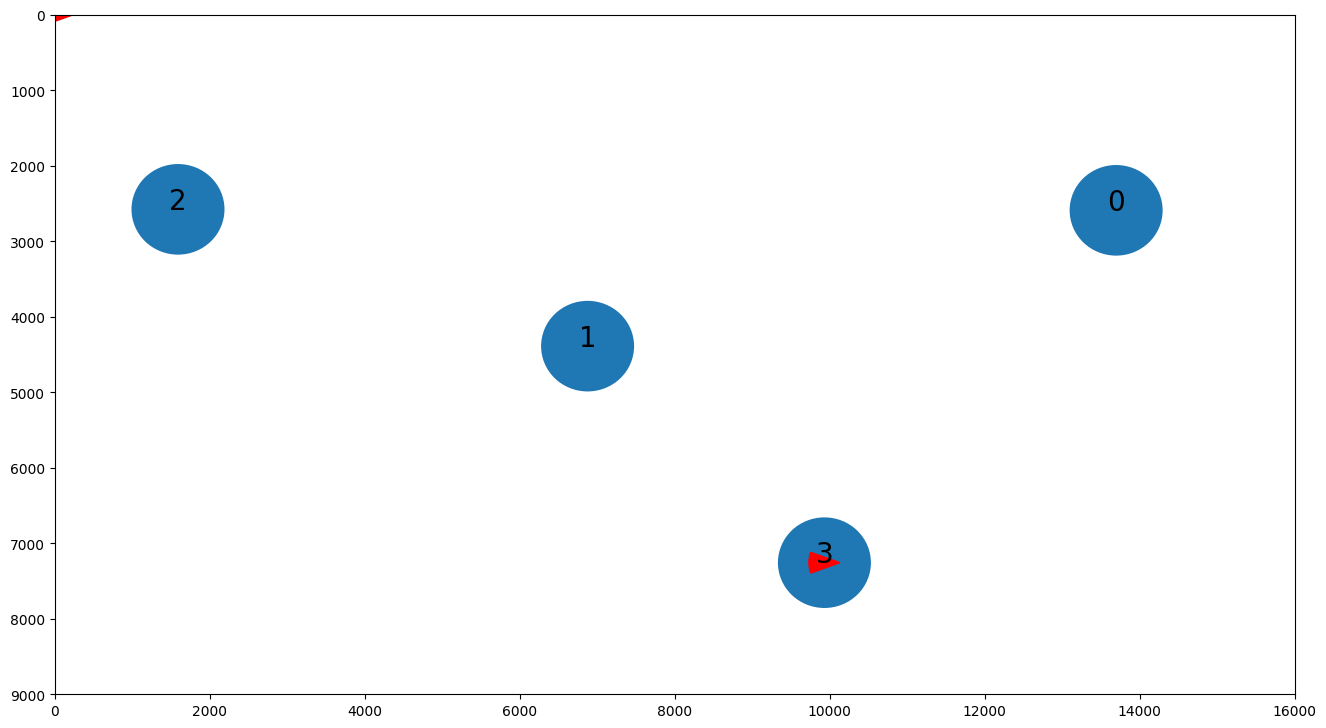

In [2]:
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Circle, Wedge
from vec2 import Vec2

# ------------------------------------ Parameters
plt.rcParams['figure.figsize'] = [Constants.world_x() / 1000, Constants.world_y() / 1000]
plt.rcParams['figure.dpi'] = 100

fig = plt.figure()
ax = plt.axes(xlim=(0, Constants.world_x()), ylim=(0, Constants.world_y()))
ax.invert_yaxis()

# ------------------------------------ Checkpoints
for (idx, check) in enumerate(world.checkpoints):
    circle = Circle((check.x, check.y), Constants.check_radius())
    ax.add_artist(circle)
    ax.annotate(str(idx), xy=(check.x, check.y), fontsize=20, ha="center")

# ------------------------------------ Pods
for (idx, player) in enumerate(world.players):
    pod = player.pod
    angleDeg = math.degrees(pod.angle) + 180.0
    offset = Vec2(Constants.pod_radius() / 2, 0).rotate(math.radians(angleDeg))
    center = pod.pos - offset
    wedge = Wedge((center.x, center.y), Constants.pod_radius(), angleDeg - 20, angleDeg + 20, color = "red")
    ax.add_artist(wedge)

plt.show()

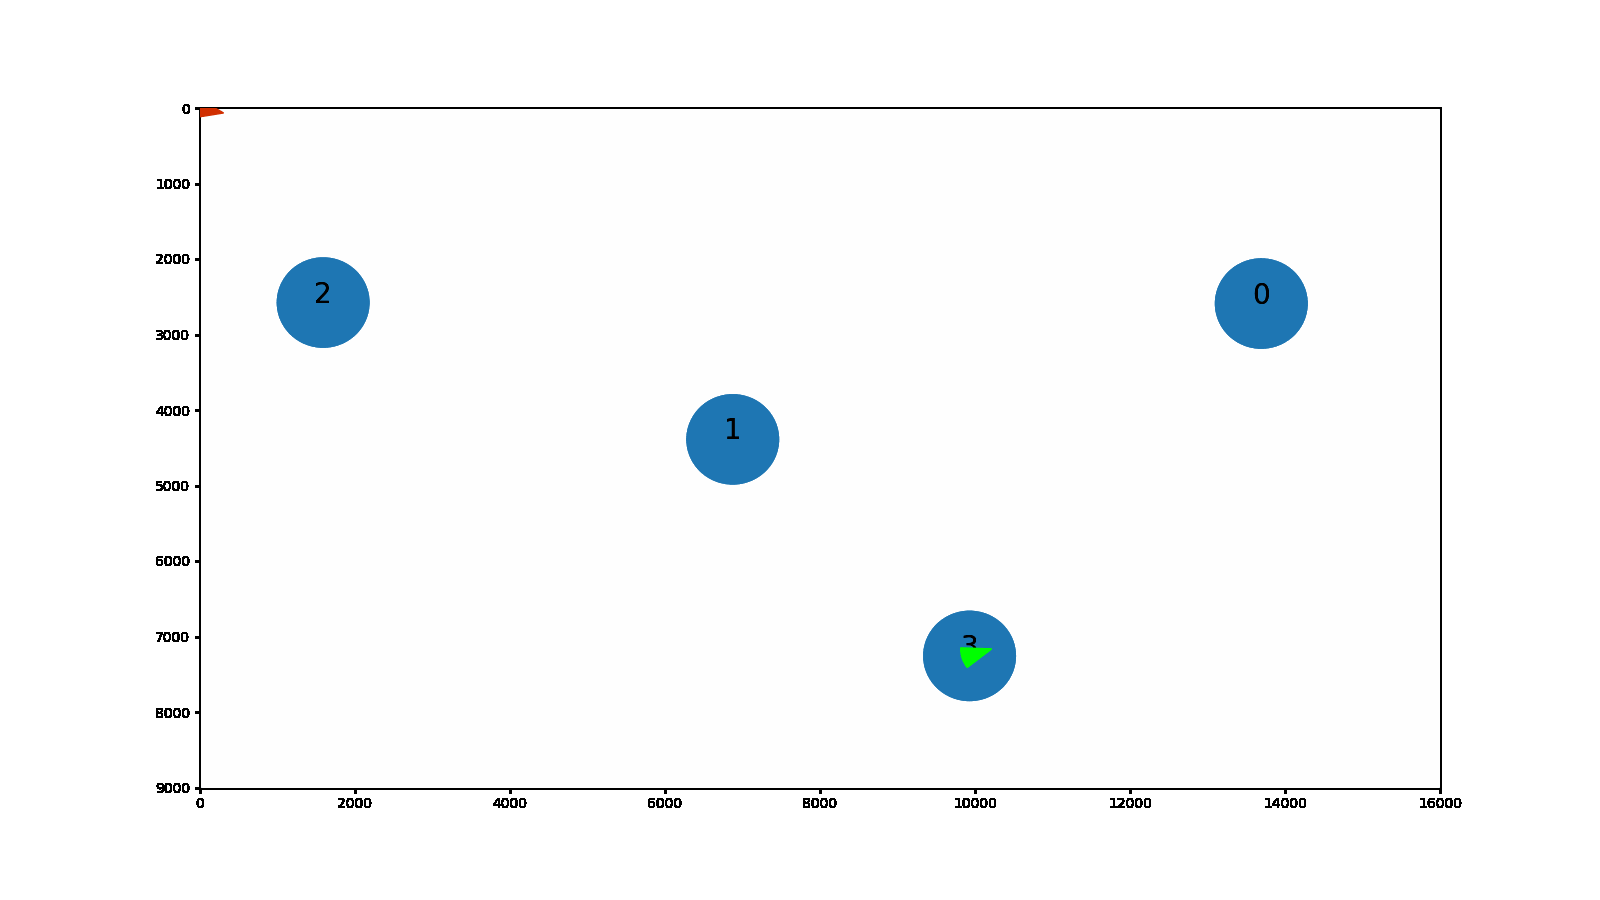

In [3]:
from drawer import Drawer
from IPython.display import HTML
from matplotlib.animation import PillowWriter
from IPython.display import Image

file = '/tf/notebooks/pods.gif'
d = Drawer(world)
anim = d.animate(file)
Image(filename = file)